In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import skew
from scipy.stats import kurtosis

## EWMA

#### For the EWMA model we use lambda = 0.94 which was found to maximize the likelihood on Q2. We use the last S&P data point for the initial stock price, which was "S_old = 2850.13", and its volatility of 0.0874 as today's volatility. In this simulation, we conduct 200.000 simulations to obtain a better performance.

In [16]:
import random
import math

Stock_price = []
Return_EWMA = []
Variance = []

mu = 0.07
number_of_days = 252
lambda_l = 0.94

for i in range(200000):
    S_old = 2850.13
    Sigma_old = 0.0874
    
    for j in range(0, number_of_days):
        phi = random.normalvariate(0, 1)
        S_new = S_old*math.exp((mu/252 - 0.5*Sigma_old**2) + Sigma_old*phi)
        
        if (S_old == 0.0):                  # avoid divisions by 0
            #print("Found a zero S_old")
            continue;
        
        variance = lambda_l * (Sigma_old**2) + (1-lambda_l)*(((S_new - S_old)/S_old)**2)
        Return = (S_new - S_old)/S_old
        
        Sigma_old = math.sqrt(variance)
        S_old = S_new
    
    Stock_price.append(S_new)
    Return_EWMA.append(Return)

In [17]:
# Save results in a csv file
df_EWMA = pd.DataFrame(data={"Stock Price": Stock_price, "Return": Return_EWMA})
df_EWMA.to_csv("./EWMA.csv", index=False)    

df_EWMA.head()

,Stock Price,Return
0,1297.746667,0.001712
1,403.481691,0.295660
2,2286.543304,-0.039176
3,3860.937101,0.044047
4,6081.757540,-0.011188


In [43]:
df_EWMA.describe()

,Stock Price,Return
count,2.000000e+05,200000.000000
mean,2.892062e+03,-0.000161
std,1.357087e+04,0.100275
min,0.000000e+00,-1.000000
25%,5.562304e+02,-0.038855
50%,1.400322e+03,-0.001651
75%,3.006397e+03,0.034944
max,3.335482e+06,7.631693


Text(0, 0.5, 'Frequency')

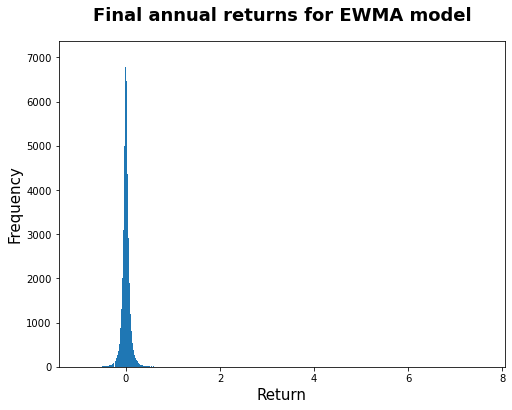

In [20]:
plt.figure(figsize=(8, 6))
df_EWMA['Return'].hist(bins=2000, grid=False)
plt.title('Final annual returns for EWMA model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Return", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

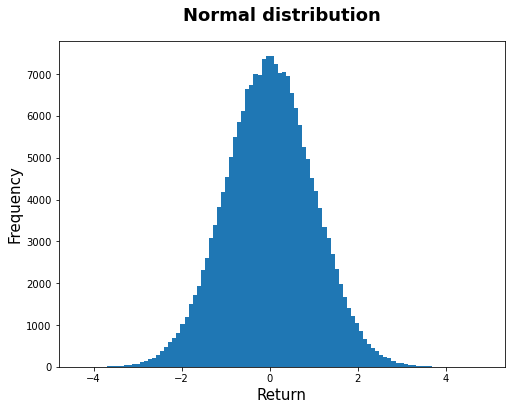

In [29]:
# Plot a normal distribution

normal = [] 
    
for i in range(200000): 
    Stock_normal = random.normalvariate(0, 1) 
    normal.append(Stock_normal) 
        
# plotting a graph 
plt.figure(figsize=(8, 6))
plt.hist(normal, bins = 100) 
plt.title('Normal distribution', fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Return", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [46]:
#Print the variance, skew and kurtosis of this simulated return distribution
print('EWMA variance: ', df_EWMA['Return'].var())
print('EWMA skew: ', df_EWMA['Return'].skew())
print('EWMA kurtosis: ', df_EWMA['Return'].kurtosis())

EWMA variance:  0.010055040329625764
EWMA skew:  7.888961045331014
EWMA kurtosis:  433.737180772622


#### Skewness above 0 indicates possible non-normality. This kurtosis highly above 0 suggests non-normality and thus high risk. This can also indicate higher presence of outliers such as extreme negative and positive returns.

## GARCH(1,1)

#### For the GARCH(1,1) model we use the parameters calibrated on Q2. We use the last S&P data point for the initial stock price, which was "S_old = 2850.13", and its volatility of 0.108747 as today's volatility. In this simulation, we conduct 200.000 simulations to obtain a better performance.

In [47]:
import random
import math

Stock_price_GARCH = []
Return_GARCH = []
Variance = []

mu = 0.07
number_of_days = 252


w = 0.00000490408
alpha = 0.179259
beta = 0.7383474

for i in range(200000):
    S_old = 2850.13
    Sigma_old = 0.108747
    
    for j in range(0, number_of_days):
        phi = random.normalvariate(0, 1)
        S_new = S_old*math.exp((mu/252 - 0.5*Sigma_old**2) + Sigma_old*phi)
        
        if (S_old == 0.0):                  # avoid divisions by 0
            continue;
                
        variance = w + alpha*(((S_new - S_old)/S_old)**2) + beta*(Sigma_old**2)
        Return = (S_new - S_old)/S_old
        
        Sigma_old = math.sqrt(variance)
        S_old = S_new
    
    Stock_price_GARCH.append(S_new)
    Return_GARCH.append(Return)

In [53]:
df_GARCH = pd.DataFrame(data={"Stock Price": Stock_price_GARCH, "Return": Return_GARCH})
df_GARCH.to_csv("./GARCH.csv", index=False)    

df_GARCH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Stock Price  200000 non-null  float64
 1   Return       200000 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB


In [49]:
df_GARCH.head()

,Stock Price,Return
0,2574.215022,-0.009536
1,2434.414702,0.001482
2,3000.373736,0.001958
3,4580.039981,0.001672
4,5317.152564,0.001784


In [50]:
df_GARCH.describe()

,Stock Price,Return
count,2.000000e+05,200000.000000
mean,3.056201e+03,0.000279
std,1.605530e+03,0.007723
min,5.470252e-13,-0.060581
25%,2.250176e+03,-0.004460
50%,2.847100e+03,0.000256
75%,3.571770e+03,0.005028
max,2.363741e+05,0.084447


Text(0, 0.5, 'Frequency')

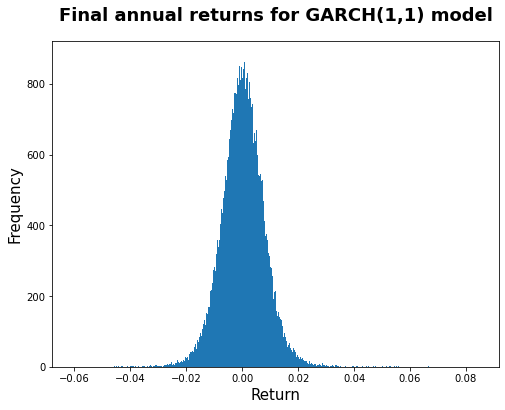

In [63]:
plt.figure(figsize=(8, 6))
df_GARCH['Return'].hist(bins=2000, grid=False)
plt.title('Final annual returns for GARCH(1,1) model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Return", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

In [52]:
#Print the variance, skew and kurtosis of this simulated return distribution
print('GARCH variance: ', df_GARCH['Return'].var())
print('GARCH skew: ', df_GARCH['Return'].skew())
print('GARCH kurtosis: ', df_GARCH['Return'].kurtosis())

GARCH variance:  5.9637425893224636e-05
GARCH skew:  0.022160820707396566
GARCH kurtosis:  1.8173970802412716


## ASYMMETRIC GARCH model

#### For the asymmetric GARCH model we use the parameters calibrated on Q2. We use the last S&P data point for the initial stock price, which was "S_old = 2850.13", and its volatility of 0.10659 as today's volatility. In this simulation, we conduct 200.000 simulations to obtain a better performance.

In [100]:
import random
import math

Stock_price_asyGARCH = []
Return_asyGARCH = []
Variance = []

mu = 0.07
number_of_days = 252


w = 0.00000064573
alpha = 0.183318
beta = 0.722452
kappa = 0.005637

for i in range(200000):
    S_old = 2850.13
    Sigma_old = 0.10659
    
    for j in range(0, number_of_days):
        phi = random.normalvariate(0, 1)
        S_new = S_old*math.exp((mu/252 - 0.5*Sigma_old**2) + Sigma_old*phi)
        
        if (S_old == 0.0):                  # avoid divisions by 0
            continue;
                
        variance = w + alpha*(((S_new - S_old)/S_old - kappa)**2) + beta*(Sigma_old**2)
        Return = (S_new - S_old)/S_old
        
        Sigma_old = math.sqrt(variance)
        S_old = S_new
    
    Stock_price_asyGARCH.append(S_new)
    Return_asyGARCH.append(Return)

In [101]:
df_asyGARCH = pd.DataFrame(data={"Stock Price": Stock_price_asyGARCH, "Return": Return_asyGARCH})
df_asyGARCH.to_csv("./asyGARCH.csv", index=False)    


In [102]:
df_asyGARCH.head()

,Stock Price,Return
0,2337.319829,0.014565
1,2671.887065,0.002389
2,2572.063304,0.008283
3,937.011459,0.001133
4,2900.976417,-0.009006


In [103]:
df_asyGARCH.describe()

,Stock Price,Return
count,200000.000000,200000.000000
mean,3053.746767,0.000276
std,1240.533006,0.007907
min,0.295093,-0.076291
25%,2314.109298,-0.004277
50%,2893.417091,0.000243
75%,3574.042904,0.004787
max,86620.398621,0.087881


Text(0, 0.5, 'Frequency')

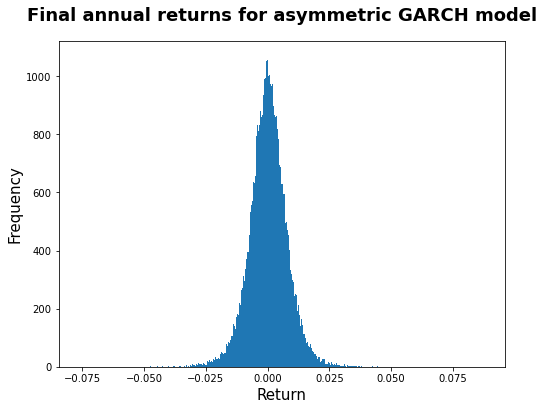

In [104]:
plt.figure(figsize=(8, 6))
df_asyGARCH['Return'].hist(bins=2000, grid=False)
plt.title('Final annual returns for asymmetric GARCH model', fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Return", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

In [105]:
#Print the variance, skew and kurtosis of this simulated return distribution
print('Asymmetric GARCH variance: ', df_asyGARCH['Return'].var())
print('Asymmetric GARCH skew: ', df_asyGARCH['Return'].skew())
print('Asymmetric GARCH kurtosis: ', df_asyGARCH['Return'].kurtosis())

Asymmetric GARCH variance:  6.251658551051644e-05
Asymmetric GARCH skew:  0.08068632116652012
Asymmetric GARCH kurtosis:  2.9912942154787188


#### Write a table that contains the variance, skew and kurtosis of the simulated returns of each model.

In [106]:
df_statistics = pd.DataFrame({'Variance': [df_EWMA['Return'].var(), df_GARCH['Return'].var(), df_asyGARCH['Return'].var()],
                        'Skew': [df_EWMA['Return'].skew(), df_GARCH['Return'].skew(), df_asyGARCH['Return'].skew()],
                        'Kurtosis': [df_EWMA['Return'].kurtosis(), df_GARCH['Return'].kurtosis(), df_asyGARCH['Return'].kurtosis()]},
                        index=['EWMA', 'GARCH(1,1)', 'Asymmetric GARCH'])

df_statistics.head()

,Variance,Skew,Kurtosis
EWMA,0.010055,7.888961,433.737181
"GARCH(1,1)",0.000060,0.022161,1.817397
Asymmetric GARCH,0.000063,0.080686,2.991294


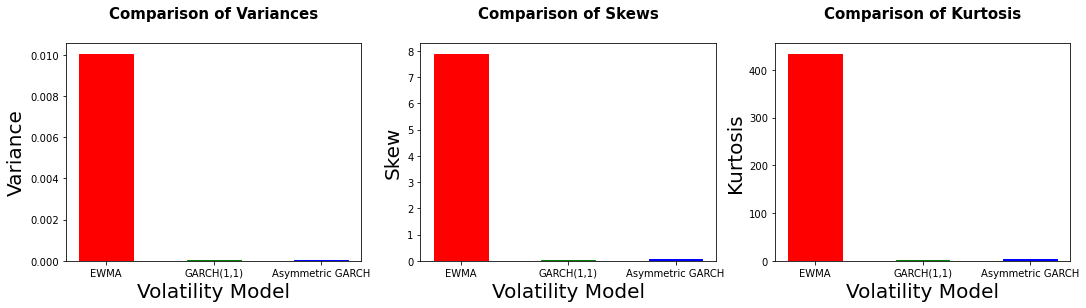

In [107]:
Fig6 = plt.figure(figsize=(18,4))

models = ["EWMA", "GARCH(1,1)", "Asymmetric GARCH"]
Variances = [df_EWMA['Return'].var(), df_GARCH['Return'].var(), df_asyGARCH['Return'].var()]
Skews = [df_EWMA['Return'].skew(), df_GARCH['Return'].skew(), df_asyGARCH['Return'].skew()]
Kurtosis = [df_EWMA['Return'].kurtosis(), df_GARCH['Return'].kurtosis(), df_asyGARCH['Return'].kurtosis()]

# Draw first subplot 
plt.subplot(1, 3, 1)
barlist_1 = plt.bar(models, Variances, width=0.5, alpha=1.00)
barlist_1[0].set_color('r')
barlist_1[1].set_color('g')
barlist_1[2].set_color('b')
plt.xlabel('Volatility Model', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.title('Comparison of Variances', fontsize=15, fontweight='bold', pad=25)

# Draw second subplot 
plt.subplot(1, 3, 2)
barlist_2 = plt.bar(models, Skews, width=0.5, alpha=1.00)
barlist_2[0].set_color('r')
barlist_2[1].set_color('g')
barlist_2[2].set_color('b')
plt.xlabel('Volatility Model', fontsize=20)
plt.ylabel('Skew', fontsize=20)
plt.title('Comparison of Skews', fontsize=15, fontweight='bold', pad=25)

# Draw Third subplot 
plt.subplot(1, 3, 3)
barlist_3 = plt.bar(models, Kurtosis, width=0.5, alpha=1.00)
barlist_3[0].set_color('r')
barlist_3[1].set_color('g')
barlist_3[2].set_color('b')
plt.xlabel('Volatility Model', fontsize=20)
plt.ylabel('Kurtosis', fontsize=20)
plt.title('Comparison of Kurtosis', fontsize=15, fontweight='bold', pad=25)


plt.show()

In [108]:
Fig6.savefig('Model_comparisons.pdf')

# Conclusions

As a conclusion, we simulated the S&P using each of the volatility models we calibrated for 1 year into the future using daily steps. In order to have a better performance, we conducted 200.000 simulations. As can be seen here, for each model we graph a histogram plot of the final annual returns to compare to a normal distribution we built using the same number of simulations and then calculated the variance, skew and kurtosis of the simulated returns distributions. 

As a result, we saw that EWMA model has the highest variance together with a kurtosis highly above 0 compared to the GARCH(1,1) and asymmetric GARCH models. Thus, we conclude that for this S&P analysis, EWMA model is highly risky compared to the others. The returns distributions of the GARCH models are not too different, but since the basic GARCH(1,1) model has the smallest kurtosis and smallest skew, it is the model that is closest to a normal distribution model.